Map: Enhanced Global Earthquake Density

Description

This map was created for the 30-Day Mapping Challenge, using AI-generated earthquake data to visualize global density patterns. A fiery magma palette represents density, with dynamic dot scaling to highlight areas of higher activity. The sleek CartoDB DarkMatter basemap emphasizes the glowing points, while the minimalistic design avoids clutter. The playful Comic Sans MS font adds a lighthearted touch to the dramatic aesthetic.

Aesthetics

	1.	Color Palette: A vibrant magma colormap symbolizes the intensity of earthquakes.
	2.	Dark Theme: A dark basemap enhances contrast and focuses attention on density.
	3.	Minimalism: Semi-transparent borders and no axes for a clean, modern look.
	4.	Dynamic Dots: Size and glow reflect density, creating a visually engaging effect.

This map demonstrates how AI can drive creative, visually striking geographic visualizations while delivering meaningful insights for the challenge. However, it was hard getting it to do exactly what I wanted. 

/var/folders/41/93fvfx5910ldvs4p20rv5w540000gn/T/ipykernel_1372/1869456582.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


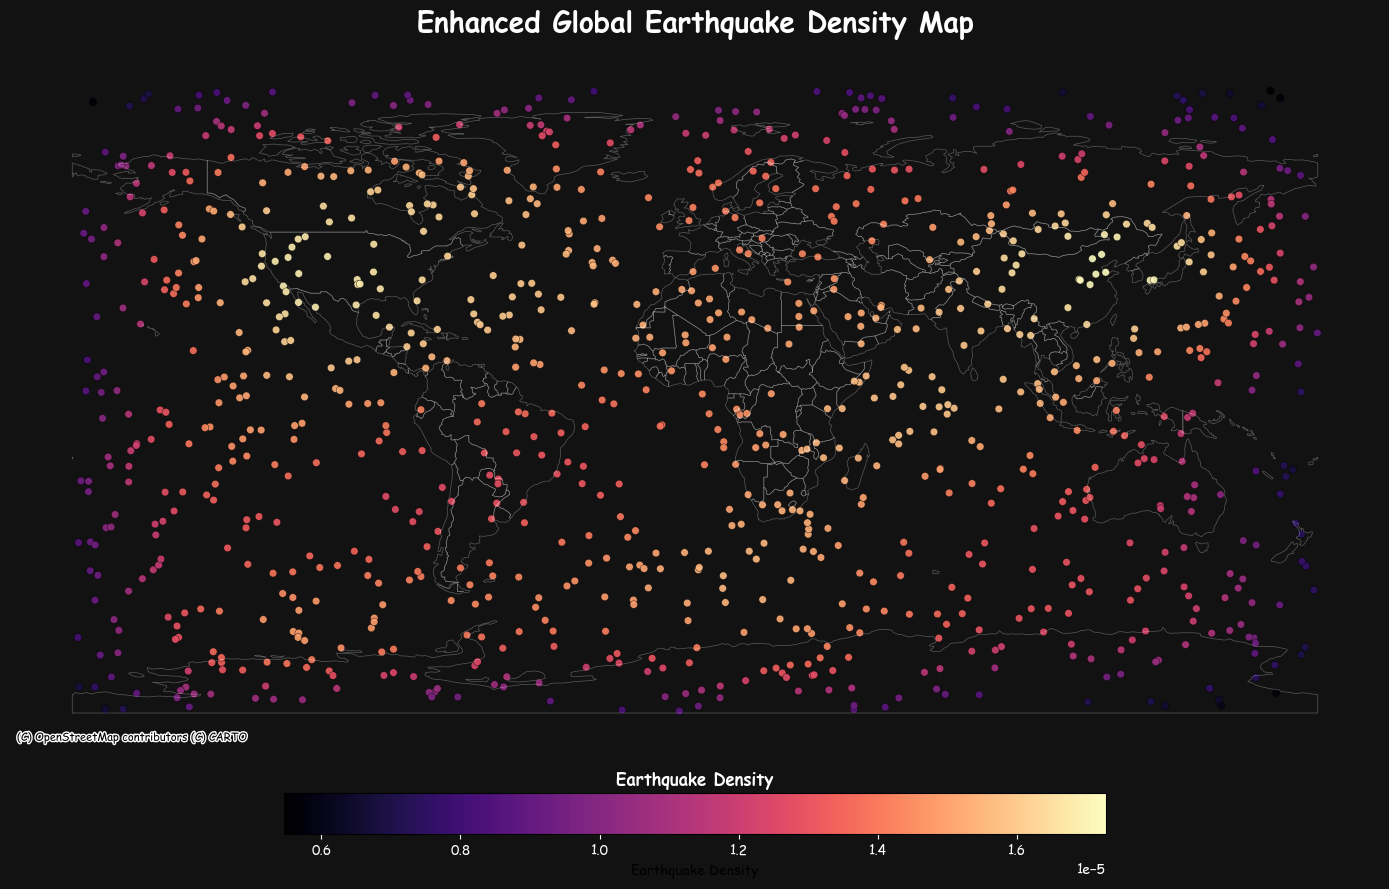

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from scipy.stats import gaussian_kde
import numpy as np
from matplotlib import rcParams

# Set a playful font from the default matplotlib fonts (e.g., Comic Sans MS)
rcParams["font.family"] = "Comic Sans MS"

# Load the naturalearth_lowres dataset for basemap context
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# Generate synthetic earthquake data
np.random.seed(42)
num_earthquakes = 1000
lons = np.random.uniform(-180, 180, num_earthquakes)
lats = np.random.uniform(-90, 90, num_earthquakes)
earthquakes = gpd.GeoDataFrame(geometry=gpd.points_from_xy(lons, lats), crs="EPSG:4326")

# Calculate a density heatmap using Gaussian KDE
coords = np.vstack([earthquakes.geometry.x, earthquakes.geometry.y])
kde = gaussian_kde(coords)(coords)

# Add density as a column to the GeoDataFrame
earthquakes["density"] = kde

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))
fig.patch.set_facecolor("#121212")  # Set the figure background to dark

# Plot the density heatmap
earthquakes.plot(
    ax=ax,
    column="density",
    cmap="magma",  # Vibrant heatmap palette
    markersize=30 + (earthquakes["density"] * 800),  # Scale size dynamically
    alpha=0.9,  # Increase opacity for distinct dots
    edgecolor="black",  # Add stroke for clarity
    linewidth=0.3,
    legend=True,
    legend_kwds={
        "label": "Earthquake Density",
        "orientation": "horizontal",
        "shrink": 0.6,
        "pad": 0.05,
    },
)

# Overlay country borders with transparency
world.boundary.plot(ax=ax, color="white", linewidth=0.5, alpha=0.3)

# Add a dark basemap for better contrast
ctx.add_basemap(ax, source=ctx.providers.CartoDB.DarkMatter, crs="EPSG:4326")

# Customize aesthetics
ax.set_title(
    "Enhanced Global Earthquake Density Map", fontsize=20, fontweight="bold", color="white", pad=20
)
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor("#121212")  # Darken the map background
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# Customize the legend
cbar = ax.get_figure().get_axes()[-1]  # Access the colorbar axis
cbar.tick_params(labelsize=10, colors="white")
cbar.set_facecolor("#121212")
cbar.set_title("Earthquake Density", fontweight="bold", fontsize=12, color="white")

# Adjust margins to remove white borders
plt.subplots_adjust(left=0, right=1, top=0.95, bottom=0)

# Show the map
plt.tight_layout()
plt.show()